# Определение перспективного тарифа для телеком компании

<div class="alert alert-info">

## Шаг 1. Откроем файлы с данными и изучим общую информацию

Имортируем необходимые библиотеки:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st

Откроем файлы с данными:

In [5]:
calls_data = pd.read_csv('/datasets/calls.csv')
internet_data = pd.read_csv('/datasets/internet.csv')
messages_data = pd.read_csv('/datasets/messages.csv')
tariffs_data = pd.read_csv('/datasets/tariffs.csv')
users_data = pd.read_csv('/datasets/users.csv')

Выведем основную информацию о датафреймах:

In [6]:
data_frames = [[calls_data, 'Информация о звонках'], [internet_data, 'Информация об интернете'], [messages_data, 'Информация о смс'], [tariffs_data, 'Информация о тарифе'], [users_data, 'Информация об абонентах']]
for data, data_name in data_frames:
    print('************************')
    print(data_name)
    print('************************')
    display(data.info())
    display(data.head())
    display(data.describe())
    display(data.duplicated().value_counts())

************************
Информация о звонках
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


False    202607
dtype: int64

************************
Информация об интернете
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


False    149396
dtype: int64

************************
Информация о смс
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


False    123036
dtype: int64

************************
Информация о тарифе
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


False    2
dtype: int64

************************
Информация об абонентах
************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


False    500
dtype: int64

<div class="alert alert-info">

## Шаг 2. Предобработаем данные

### 2.1. Округлим в большую сторону значения минут и мегабайтов

«Мегалайн» всегда округляет вверх значения минут и мегабайтов. По этой причине округлим в большую сторону значения в столбцах `calls_data['duration']` и `internet_data['mb_used']`.

In [7]:
calls_data['duration'] = calls_data['duration'].apply(np.ceil).astype('int64')
internet_data['mb_used'] = internet_data['mb_used'].apply(np.ceil).astype('int64')

### 2.2. Приведем данные к нужным типам

Многие значения в датафреймах неправильных типов. Исправим эти ошибки.

In [8]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format='%Y-%m-%dT')
calls_data['duration'] = calls_data['duration'].astype('int64')
calls_data['user_id'] = calls_data['user_id'].astype('object')

internet_data['mb_used'] = internet_data['mb_used'].astype('int64')
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format='%Y-%m-%dT')
internet_data['user_id'] = internet_data['user_id'].astype('object')

messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format='%Y-%m-%dT')
messages_data['user_id'] = messages_data['user_id'].astype('object')

users_data['reg_date'] = pd.to_datetime(users_data['reg_date'], format='%Y-%m-%dT')
users_data['user_id'] = users_data['user_id'].astype('object')

### 2.3. Удалим артефактный столбец

В датафрейме `internet_data` имеется артефактный столбец, дублирующий индексы. Удалим его.

In [9]:
internet_data = internet_data.drop(columns = ['Unnamed: 0'])

### 2.4. Обработаем нулевые и пропущенные значения

Обратили внимание, что примерно 20% звонков длительностью 0.0 минут, и 13% интернет-сессий по 0 мб. Это могут быть пропущенные звонки, и неуспешные интернет-сессии, поэтому не будем их обрабатывать.

In [10]:
len(calls_data.query('duration == 0'))/ len(calls_data)

0.19551644316336553

In [11]:
len(internet_data.query('mb_used == 0'))/ len(internet_data)

0.13118155773916304

Внутри исходных датафреймов отсутствуют пропущенные значения.

### 2.5. Расчетаем параметры для каждого пользователя


#### 2.5.1. Количество сделанных звонков и израсходованных минут разговора по месяцам

In [12]:
calls_data['month'] = calls_data['call_date'].dt.month
calls_id_month = calls_data.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum'])
calls_id_month.columns = ['amount of calls', 'total duration']
display(calls_id_month)

amount of calls  total duration
user_id month                                 
1000    5                   22             159
        6                   43             172
        7                   47             340
        8                   52             408
        9                   58             466
...                        ...             ...
1498    10                  41             247
1499    9                    9              70
        10                  68             449
        11                  74             612
        12                  69             492

[3174 rows x 2 columns]

#### 2.5.2. Количество отправленных сообщений по месяцам

In [13]:
messages_data['month'] = messages_data['message_date'].dt.month
messages_id_month = messages_data.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
messages_id_month.columns = ['amount of messages']
display(messages_id_month)

amount of messages
user_id month                    
1000    5                      22
        6                      60
        7                      75
        8                      81
        9                      57
...                           ...
1498    10                     42
1499    9                      11
        10                     48
        11                     59
        12                     66

[2717 rows x 1 columns]

#### 2.5.3. Объем израсходованного интернет-трафика по месяцам

In [14]:
internet_data['month'] = internet_data['session_date'].dt.month
internet_id_month = internet_data.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
internet_id_month.columns = ['total mb used']
display(internet_id_month)

total mb used
user_id month               
1000    5               2256
        6              23257
        7              14016
        8              14070
        9              14581
...                      ...
1498    10             20604
1499    9               1848
        10             17809
        11             17984
        12             13077

[3203 rows x 1 columns]

#### 2.5.4. Помесячную выручку с каждого пользователя

Объеденим параметры в одну сводную таблицу.

In [63]:
merged_pivot = calls_id_month.merge(messages_id_month, on=['user_id','month'], how='left').merge(internet_id_month, on=['user_id','month'], how='outer')
merged_pivot.info()
merged_pivot

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1489, 12)
Data columns (total 4 columns):
amount of calls       3174 non-null float64
total duration        3174 non-null float64
amount of messages    2678 non-null float64
total mb used         3203 non-null float64
dtypes: float64(4)
memory usage: 113.9 KB


amount of calls  total duration  amount of messages  \
user_id month                                                        
1000    5                 22.0           159.0                22.0   
        6                 43.0           172.0                60.0   
        7                 47.0           340.0                75.0   
        8                 52.0           408.0                81.0   
        9                 58.0           466.0                57.0   
...                        ...             ...                 ...   
1489    8                  NaN             NaN                 NaN   
        9                  NaN             NaN                 NaN   
        10                 NaN             NaN                 NaN   
        11                 NaN             NaN                 NaN   
        12                 NaN             NaN                 NaN   

               total mb used  
user_id month                 
1000    5             2256.0  
        6            23257.0  
        7            14016.0  
        8            14070.0  
        9            14581.0  
...                      ...  
1489    8            11066.0  
        9            17232.0  
        10           19588.0  
        11           17516.0  
        12           17341.0  

[3214 rows x 4 columns]

Отразим тарифный план каждого абонента.

In [64]:
tariffs = users_data[['user_id', 'tariff']]
merged_pivot = merged_pivot.reset_index().merge(tariffs, on='user_id', how='left')
merged_pivot = merged_pivot.fillna(0)
merged_pivot['amount of messages'] = merged_pivot['amount of messages'].astype('int64')
merged_pivot['total mb used'] = merged_pivot['total mb used'].astype('int64')

Добавим в таблицу количество ихрасходованных услуг сверх предусмотренных абенентской платой.

In [65]:
def paid_duration(row):
    if row['tariff'] == 'smart':
        row['paid_duration'] = row['total duration'] - 500
    if row['tariff'] == 'ultra':
        row['paid_duration'] = row['total duration'] - 3000
    return row['paid_duration']    
    
def paid_messages(row):
    if row['tariff'] == 'smart':
        row['paid_messages'] = row['amount of messages'] - 50
    if row['tariff'] == 'ultra':
        row['paid_messages'] = row['amount of messages'] - 1000    
    return row['paid_messages']

def paid_mb(row):
    if row['tariff'] == 'smart':
        row['paid_mb'] = row['total mb used'] - 15000
    if row['tariff'] == 'ultra':
        row['paid_mb'] = row['total mb used'] - 30000    
    return row['paid_mb']
    
merged_pivot['paid_duration'] = merged_pivot.apply(paid_duration, axis = 1).clip(lower=0)
merged_pivot['paid_messages'] = merged_pivot.apply(paid_messages, axis = 1).clip(lower=0)
merged_pivot['paid_mb'] = merged_pivot.apply(paid_mb, axis = 1).clip(lower=0)
display(merged_pivot)

,user_id,month,amount of calls,total duration,amount of messages,total mb used,tariff,paid_duration,paid_messages,paid_mb
0,1000,5,22.0,159.0,22,2256,ultra,0.0,0,0
1,1000,6,43.0,172.0,60,23257,ultra,0.0,0,0
2,1000,7,47.0,340.0,75,14016,ultra,0.0,0,0
3,1000,8,52.0,408.0,81,14070,ultra,0.0,0,0
4,1000,9,58.0,466.0,57,14581,ultra,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,0,11066,smart,0.0,0,0
3210,1489,9,0.0,0.0,0,17232,smart,0.0,0,2232
3211,1489,10,0.0,0.0,0,19588,smart,0.0,0,4588
3212,1489,11,0.0,0.0,0,17516,smart,0.0,0,2516


Расчитаем стоиомсть услуг, оплаченных пользователем, за каждый месяц.

In [66]:
def revenue(row):
    if row['tariff'] == 'smart':
        row['revenue'] = 550 + row['paid_duration']*3 + row['paid_messages']*3 + row['paid_mb']*0.2
    if row['tariff'] == 'ultra':
        row['revenue'] = 1950 + row['paid_duration']*1 + row['paid_messages']*1 + row['paid_mb']*0.15
    return row['revenue']
    
merged_pivot['revenue'] = merged_pivot.apply(revenue, axis = 1)
display(merged_pivot.describe())

,user_id,month,amount of calls,total duration,amount of messages,total mb used,paid_duration,paid_messages,paid_mb,revenue
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,1251.590230,8.317362,63.038892,451.244866,37.607654,17227.585252,28.854698,4.022402,2334.110765,1531.345924
std,144.659172,2.905413,33.236368,241.909978,35.649818,7578.261501,73.077172,11.508916,3558.649766,807.903738
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1125.000000,6.000000,40.000000,282.000000,8.000000,12505.250000,0.000000,0.000000,0.000000,729.550000
50%,1253.000000,9.000000,62.000000,443.000000,29.000000,16966.500000,0.000000,0.000000,0.000000,1649.400000
75%,1378.750000,11.000000,82.000000,589.000000,57.000000,21450.000000,0.000000,0.000000,3956.500000,1950.000000
max,1499.000000,12.000000,244.000000,1673.000000,224.000000,49789.000000,935.000000,93.000000,23610.000000,6892.000000


<div class="alert alert-info">

## Шаг 3. Проанализируем данные

### 3.1. Сравним соотношение пользователей тарифов

In [67]:
len(merged_pivot.query("tariff == 'smart'"))/len(merged_pivot)

0.693528313627878

### 3.2. Сравним поведение пользователей разных тарифов, посчитаем среднее количество, дисперсию и стандартное отклонение параметров.

#### 3.2.1. Посчитаем среднее количество.

In [68]:
mean = merged_pivot.pivot_table(index='tariff', values=['amount of calls', 'total duration', 'amount of messages', 'total mb used', 'revenue'], aggfunc='mean')
display(mean)

,amount of calls,amount of messages,revenue,total duration,total mb used
tariff,,,,,
smart,58.463437,33.306415,1289.381337,417.934948,16229.188425
ultra,73.392893,47.341117,2078.898274,526.623350,19486.901523


#### 3.2.2. Посчитаем стандартное отклонение.

In [69]:
std = merged_pivot.pivot_table(index='tariff', values=['amount of calls', 'total duration', 'amount of messages', 'total mb used', 'revenue'], aggfunc='std')
display(std)

,amount of calls,amount of messages,revenue,total duration,total mb used
tariff,,,,,
smart,25.939858,28.274381,825.526447,190.313730,5877.576978
ultra,43.916853,46.935795,394.276228,317.606098,10096.317202


#### 3.2.3. Посчитаем дисперсию.

In [70]:
variance_estimate = std**2
display(variance_estimate)

,amount of calls,amount of messages,revenue,total duration,total mb used
tariff,,,,,
smart,672.876243,799.440628,681493.914445,36219.315784,3.454591e+07
ultra,1928.689990,2202.968887,155453.743696,100873.633397,1.019356e+08


#### 3.2.4. Проанализируем данные о использовании пакетов услуг тарифов методом `describe()`.

In [71]:
merged_pivot.query("tariff == 'smart'").describe()

,user_id,month,amount of calls,total duration,amount of messages,total mb used,paid_duration,paid_messages,paid_mb,revenue
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,58.463437,417.934948,33.306415,16229.188425,41.605653,5.799910,2985.823239,1289.381337
std,146.119496,2.920316,25.939858,190.313730,28.274381,5877.576978,84.678573,13.442456,3718.179470,825.526447
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,40.000000,282.000000,10.000000,12658.000000,0.000000,0.000000,0.000000,565.000000
50%,1239.000000,9.000000,60.000000,422.000000,28.000000,16531.000000,0.000000,0.000000,1531.000000,1028.800000
75%,1376.000000,11.000000,76.000000,545.000000,51.000000,20068.000000,45.000000,1.000000,5068.000000,1756.600000
max,1499.000000,12.000000,198.000000,1435.000000,143.000000,38610.000000,935.000000,93.000000,23610.000000,6892.000000


In [72]:
merged_pivot.query("tariff == 'ultra'").describe()

,user_id,month,amount of calls,total duration,amount of messages,total mb used,paid_duration,paid_messages,paid_mb,revenue
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.000000,985.000000
mean,1263.094416,8.250761,73.392893,526.623350,47.341117,19486.901523,0.0,0.0,859.321827,2078.898274
std,140.694908,2.871762,43.916853,317.606098,46.935795,10096.317202,0.0,0.0,2628.508184,394.276228
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1950.000000
25%,1143.000000,6.000000,41.000000,284.000000,3.000000,11785.000000,0.0,0.0,0.000000,1950.000000
50%,1277.000000,9.000000,74.000000,518.000000,37.000000,19324.000000,0.0,0.0,0.000000,1950.000000
75%,1381.000000,11.000000,104.000000,752.000000,77.000000,26863.000000,0.0,0.0,0.000000,1950.000000
max,1495.000000,12.000000,244.000000,1673.000000,224.000000,49789.000000,0.0,0.0,19789.000000,4918.350000


#### 3.2.5. Постороим графики. 

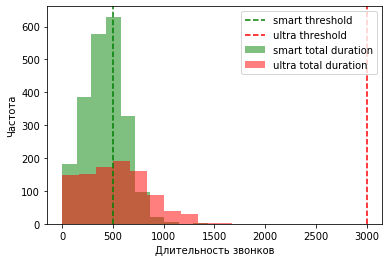

In [73]:
merged_pivot.query("tariff == 'smart'")['total duration'].plot(kind='hist', alpha=0.5, color='green', label='smart total duration')
merged_pivot.query("tariff == 'ultra'")['total duration'].plot(kind='hist', alpha=0.5, color='red', label='ultra total duration')
plt.xlabel('Длительность звонков')
plt.ylabel('Частота')
plt.axvline(x=500, linestyle='--', color='green', label='smart threshold')
plt.axvline(x=3000, linestyle='--', color='red', label='ultra threshold')
plt.legend(loc='upper right')

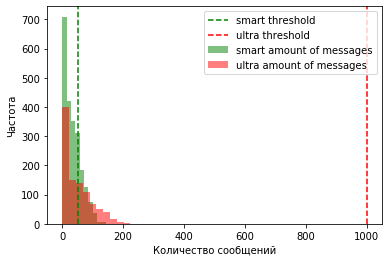

In [85]:
merged_pivot.query("tariff == 'smart'")['amount of messages'].plot(kind='hist', alpha=0.5, color='green', label='smart amount of messages')
merged_pivot.query("tariff == 'ultra'")['amount of messages'].plot(kind='hist', alpha=0.5, color='red', label='ultra amount of messages')
plt.xlabel('Количество сообщений')
plt.ylabel('Частота')
plt.axvline(x=50, linestyle='--', color='green', label='smart threshold')
plt.axvline(x=1000, linestyle='--', color='red', label='ultra threshold')
plt.legend(loc='upper right')

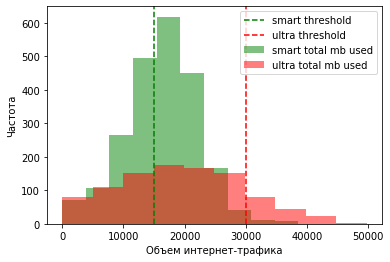

In [75]:
merged_pivot.query("tariff == 'smart'")['total mb used'].plot(kind='hist', alpha=0.5, color='green', label='smart total mb used')
merged_pivot.query("tariff == 'ultra'")['total mb used'].plot(kind='hist', alpha=0.5, color='red', label='ultra total mb used')
plt.xlabel('Объем интернет-трафика')
plt.ylabel('Частота')
plt.axvline(x=15000, linestyle='--', color='green', label='smart threshold')
plt.axvline(x=30000, linestyle='--', color='red', label='ultra threshold')
plt.legend(loc='upper right')

Text(0.5, 0, 'Ящик с усами по выручке')

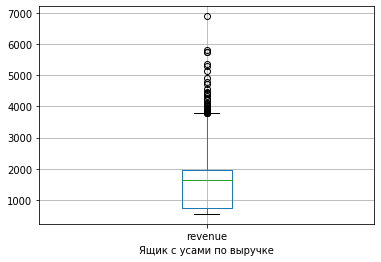

In [76]:
merged_pivot.boxplot('revenue')
plt.xlabel('Ящик с усами по выручке')

#### 3.2.6. Определим среднюю в месяц с пользователя и суммарную выручку с каждого тарифа. 

In [77]:
display(merged_pivot.pivot_table(index = 'tariff', values='revenue', aggfunc=['mean','sum']))

,mean,sum
,revenue,revenue
tariff,,
smart,1289.381337,2874031.0
ultra,2078.898274,2047714.8


#### 3.2.7. Сравним траты пользователей разных городов

Объеденим датафреймы в которых отражены выручка и город.

In [78]:
cities = users_data[['user_id', 'city']]
revenue = merged_pivot[['user_id', 'revenue']]

cities_revenue = cities.merge(revenue, how='left').dropna()

Определим города с слишком маленьким числом пользователей.

In [79]:
users_number = users_data.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
top_users_number = users_number[users_number >= 5].dropna()

Исключим из датафрейма города, с числом пользователей менее 5.

In [80]:
cities_revenue = cities_revenue[cities_revenue['city'].isin(top_users_number.index)]

Выведем сводную таблицу с сортировкой по убыванию.

In [81]:
display(cities_revenue.pivot_table(index='city', values='revenue', aggfunc='mean').sort_values(by='revenue', ascending=False))

,revenue
city,
Воронеж,2315.765385
Нижний Новгород,1935.252778
Красноярск,1908.929348
Пенза,1788.305455
Новосибирск,1780.095408
Ростов-на-Дону,1753.763333
Челябинск,1717.811538
Сочи,1643.176316
Вологда,1628.950000


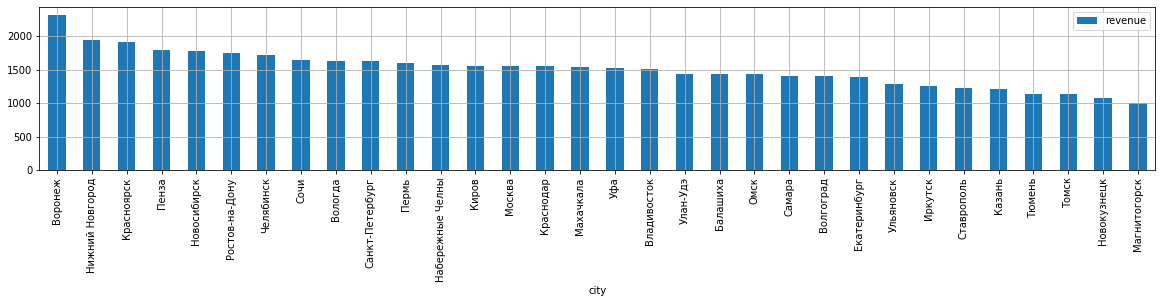

In [82]:
cities_revenue.pivot_table(index='city', values='revenue', aggfunc='mean').sort_values('revenue', ascending=False).plot(kind='bar', figsize=(20,3), grid=True)

### 3.3. Вывод.

В результате проведенного анализа пришли к следующим выводам:
- У 70% пользователей подключен тариф "Смарт", а у остальных 30% - тариф "Ультра".
- У тарифа "Ультра" стандартное отклонение и дисперсия по всем параметрам кроме `revenue` выше. Это говорит о том, что хоть у них и включены большие пакеты услуг в абонентскую плату, которые они смело тратят, но в целом абсолютное большинство пользователей не используют большУю часть тарифных пакетов. И соответственно за лимиты пакетов тарифных пакетов они очень редко заходят.
- Среди пользователей тарифа "Ультра" ни один человек не использовал минуты и сообщения сверх тарифного пакета, и лишь один человек потратил больше интернет-трафика, чем включено в тариф. Пользователи тарифа "Смарт" чаще и больше используют услуги сверх тарифного пакета.
- Выручка в среднем в месяц с пользователя тарифа "Смарт" меньше, чем с пользователя тарифа "Ультра". Однако, в целом тариф "Смарт" приносит больше прибыли, так как значительно больше пользователей.
- Среди городов с числом пользователей 5 и более первым по средней выручке с человека в месяц явлется г.Воронеж (2316 руб), а последним - Магнитогорск (1006 руб).

<div class="alert alert-info">

## Шаг 4. Проверим гипотезы

### 4.1. Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Выдвенем нулевую гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна, и альтернативную гипотезу, что и она различна.

In [86]:
alpha = 0.05

revenue_smart = merged_pivot.query("tariff == 'smart'").pivot_table(index='user_id', values='revenue', aggfunc='mean')['revenue'].values
revenue_ultra = merged_pivot.query("tariff == 'ultra'").pivot_table(index='user_id', values='revenue', aggfunc='mean')['revenue'].values

results = st.ttest_ind(
    revenue_smart, 
    revenue_ultra, 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7385718703765292e-58
Отвергаем нулевую гипотезу


### 4.2. Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Выдвенем нулевую гипотезу, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов, и альтернативную гипотезу, что они различны.

In [87]:
alpha = 0.05

revenue_moscow = cities_revenue.query("city == 'Москва'").pivot_table(index='user_id', values='revenue', aggfunc='mean')['revenue'].values
revenue_other = cities_revenue.query("city != 'Москва'").pivot_table(index='user_id', values='revenue', aggfunc='mean')['revenue'].values

results = st.ttest_ind(
    revenue_moscow, 
    revenue_other)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3817614853289223
Не получилось отвергнуть нулевую гипотезу


### 4.3. Вывод

В результате выполненной проверки гипотез получили слудующий результат:
- Отвергаем нулевую гипотезу, что "средняя выручка пользователей тарифов «Ультра» и «Смарт» равна". Вынуждены принять альтернативную гипотезу, т.е. "средняя выручка пользователей тарифов «Ультра» и «Смарт» различна"
- Не получилось отвергнуть нулевую гипотезу "средняя выручка пользователей из Москвы равна выручке пользователей из других регионов", приходится ее принять. Графическое подтверждение этого также можно наблюдать на столбчатой диаграмме в шаге 3.2.7, на которой Москва находится по центру среди всех городов.

<div class="alert alert-info">

## Шаг 5. Общий вывод

В результате проведенной работы пришли к выводу, что наиболее перспективным тарифом компании является "Ультра". Необходимо направить маргетинговые усилия на то, чтобы новые пользователи, а также пользователи тарифа "Смарт", переходили на тариф "Ультра", по той причине что он приносит больше прибыли. Так как 70% пользователей используют тариф "Смарт", имеются значительные перспективы по увеличению выручки заинтересовав их переходом на тариф "Ультра".

Помимо этого, выяснили, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различна, а также что средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.